/home/saadhasan/Desktop/Assignment/Hydrogen Atom/PytChem



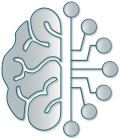

**Start at:** Sunday 10 December 2023, 00:12:28  
**Hostname:** pop-os (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)

import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

__author__ = "Thierry Leininger, LCPQ (CNRS-UT3 lab, Toulouse, France)"

 # Harmonic Oscillator

## Introduction

<div class="intro">

In this project, we propose to solve the Schrödinger equation for the one-dimensional quantum harmonic oscillator and vizualise the corresponding solutions and some of their properties. As usual, the Schrödinger equation reads:

$$\hat{H}(x)\psi_v(x)=E_v\psi_v(x)$$

with $\hat{H}=\hat{T}+\hat{V}$

The kinetic energy is given by $ \hat{T}= \frac{\hat{p}^2}{2m} $ which, with $\hat{p}=- i\hbar \frac{\partial}{\partial \hat{x}}$, becomes


$$ \hat{T}=-\frac{\hbar^{2}}{2m} \frac{\partial}{\partial x^2}$$

In the case of the harmonic oscillator the potential energy of the particle is simply 
$$\hat{V} = \frac{1}{2}kx^2$$


Thus, the Schrodinger equation one has to solve is 
    
$$[-\frac{\hbar^{2}}{2m} \frac{\partial}{\partial x^2}+\frac{1}{2}kx^2]\psi_v(x) = E_v\psi_v(x)$$

</div>

<div class="exE">

- From now on, we will choose $\hbar=m=k=1$. Plot the corresponding harmonic potential.
</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math
from scipy.constants import hbar
from scipy.integrate import quad
from scipy.special import factorial
from scipy.optimize import fsolve

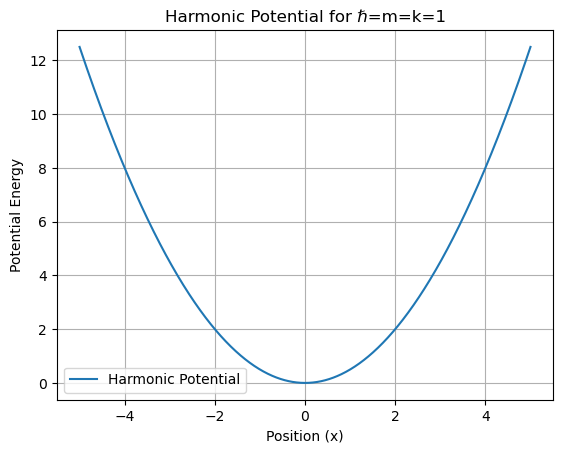

In [4]:
# Constants
h_bar = 1  # Planck's reduced constant
m = 1  # Mass
k = 1  # Spring constant

# Define the harmonic potential function
def harmonic_potential(x):
    return 0.5 * k * x**2

# Generate x values
x_values = np.linspace(-5, 5, 1000)  # Adjust the range as needed

# Calculate the corresponding potential values
potential_values = harmonic_potential(x_values)

# Plot the harmonic potential
plt.plot(x_values, potential_values, label='Harmonic Potential')
plt.title('Harmonic Potential for ℏ=m=k=1')
plt.xlabel('Position (x)')
plt.ylabel('Potential Energy')
plt.legend()
plt.grid(True)
plt.show()

### Solutions of the Schrödinger Equation

<div class="intro">

As suggested above, the solutions of the Quantum Harmonic Oscillator depend on a (<i>vibrational</i>) quantum number $v$.

The energies ($ie$ eigenvalues) are given by

$$ E_v=(v+\frac{1}{2})\hbar\omega$$ with $v=0, 1, 2, ...$ and $\omega=\sqrt{(\frac{k}{m})}$


The corresponding wavefunctions ($ie$ eigenfunctions) are given by

$$\Psi_v=N_vH_ve^{-y^2/2}$$ where $N_v$ is the normalization factor, $H_v$ the <b>Hermite polynomial</b> and $y=(\frac{mk}{\hbar^2})^{1/4}x$.


The <b>Hermite polynomials</b> are defined using a recurrence relation
$$H_{v+1}=2yH_v-2vH_{v-1}$$
with $H_0=1$ and $H_1=2y$.


<div class="exE">

Code a `Hv(v,y)` function returning the evaluation of $v^{th}$ Hermite polynomial, $H_v$ at a given value $y$
</div>

In [5]:
# function for evaluation of vth Hermite Polynomial.
def Hv(v, y):
    if v == 0:
        return 1
    elif v == 1:
        return 2 * y
    else:
        return 2*y*Hv(v-1, y)-2*(v-1)*Hv(v-2, y)


# Example usage:
v = 3  # Example quantum number
y_value = 1.5  # Example value of y

result = Hv(v, y_value)
print(f'H_{v}({y_value}) = {result}')

H_3(1.5) = 9.0


<div class="exE">

Using the `hermite` function from `sympy`, print the first 6 Hermite polynomials and check your code written in the previous cell for a few values of <i>v</i> and <i>y</i>.
The results will be advantageoulsy presented in a table (see example below) beside the expression of the `hermite`polynomial.

<p style="text-align:center;"><img width="280" src = "MiscImages/tableQHO.jpg"/></p>

</div>

In [6]:
# Define symbols
v, x = sympy.symbols('v x')

# Define ranges
ranges = [0.0, 1.2, 2.5, 3.8, 5.0]

for i in range(0, 6):
    print("v = {0}\tH_v = {1}".format(i, Hv(i, x)))
    print("{: ^10}{: ^20}{: ^20}".format("x", "Hermite(x)", "Hv(x)"))
    for j in ranges:
        my_result = Hv(i, j)
        sympy_result = sympy.hermite(i, j)
        print("{: ^10}{:18.6f}{:18.6f}".format(str(j), sympy_result, my_result))
    print()

v = 0	H_v = 1
    x          Hermite(x)            Hv(x)        
   0.0              1.000000          1.000000
   1.2              1.000000          1.000000
   2.5              1.000000          1.000000
   3.8              1.000000          1.000000
   5.0              1.000000          1.000000

v = 1	H_v = 2*x
    x          Hermite(x)            Hv(x)        
   0.0              0.000000          0.000000
   1.2              2.400000          2.400000
   2.5              5.000000          5.000000
   3.8              7.600000          7.600000
   5.0             10.000000         10.000000

v = 2	H_v = 4*x**2 - 2
    x          Hermite(x)            Hv(x)        
   0.0             -2.000000         -2.000000
   1.2              3.760000          3.760000
   2.5             23.000000         23.000000
   3.8             55.760000         55.760000
   5.0             98.000000         98.000000

v = 3	H_v = 2*x*(4*x**2 - 2) - 8*x
    x          Hermite(x)            Hv(x)        


<div class="exE">

Use the previous expression of the Hermite polynomials to verify with `sympy` that the normalization factor $N_v$ 
are given by $N=(\pi ^{1/2} 2^v v!)^{-1/2}$.</div>

In [7]:
# Define the wavefunction Psi_v(x)
def Psi_v(x, v):
    prefactor = 1 / np.sqrt(2**v * np.math.factorial(v) * np.sqrt(np.pi))
    hermite_term = np.exp(-x**2 / 2) * Hv(v, x)
    return prefactor * hermite_term

# Define the integrand for normalization
def integrand(x, v):
    return Psi_v(x, v)**2

# Perform the integration
normalization_factor, _ = quad(integrand, -np.inf, np.inf, args=(1,))

# Display the normalization factor
print(f'Normalization factor: {normalization_factor}')

# Check if the Hermite polynomial is normalized
is_normalized = np.isclose(normalization_factor, 1)

# Display the result
print(f'Is the Hermite polynomial normalized? {is_normalized}')

Normalization factor: 1.0000000000000018
Is the Hermite polynomial normalized? True


## Wavefunctions

<div class="rqT" title="Directives">
    
From now on, you have to do symbolic algebra with the SymPy library.
</div>

<div class="exE">
Compute the left-hand side of Schrödinger equation to verify that $\Psi_v(x)$ and $E_v$ are eigenfunctions and eigenvalues.

In [6]:
y = sympy.symbols('y')

# Define H(f)
def H(f):
    sympy.simplify(f)
    
    # Calculate nabla2(f)
    x = sympy.symbols('x')
    # m,k,hbar = sym.symbols('m k hbar')
    # Now consider k, m and hbar as zeros to simplify the calculation
    m = 1
    k = 1
    hbar = 1
    f = f.subs(y, (m*k/hbar**2)**(1/4)*x)

    x_der1 = sympy.diff(f,x)
    x_der2 = sympy.diff(x_der1,x)

    Hf = -hbar**2/(2*m)*x_der2 + 0.5*k*x**2*f
    sympy.simplify(Hf)
    return Hf

def phi_v(v):
    f = sympy.hermite_poly(v, y)*sympy.exp(-y**2/2) #the equation H Psi = E Psi does not depend on the normalisation so we omit it
    f = f.subs(y, (m*k/hbar**2)**(1/4)*x)

    return f

x = sympy.symbols('x')
# m,k,hbar = sym.symbols('m k hbar')
m = 1
k = 1
hbar = 1

def E_v(v):
    return hbar*np.sqrt(k/m)*(0.5+v)

for v in range(6):
    f = phi_v(v)
    print(sympy.simplify(H(f)-E_v(v)*f))

0
0
0
0
0
0


#### Lowest wavefunctions and their associated energy

<div class="exE">
    
Complete the previous plot by plotting the $\Psi_v(x)$ at level $E_v$.

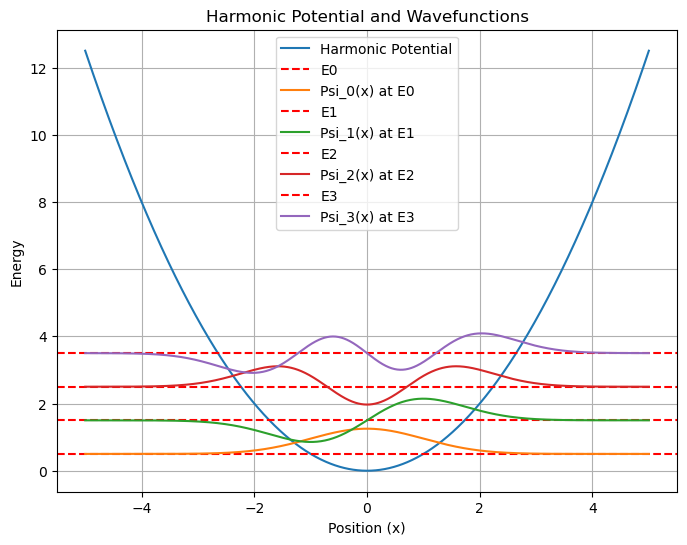

In [8]:
# Constants
m = 1  # Mass
k = 1  # Spring constant

def harmonic_potential(x):
    return 0.5 * k * x**2

def Hv(v, y):
    if v == 0:
        return 1
    elif v == 1:
        return 2 * y
    else:
        return 2*y*Hv(v-1, y)-2*(v-1)*Hv(v-2, y)

# Define the wavefunction Psi_v(x)
def Psi_v(x, v):
    prefactor = 1 / np.sqrt(2**v * np.math.factorial(v) * np.sqrt(np.pi))
    hermite_term = np.exp(-x**2 / 2) * Hv(v, x)
    return prefactor * hermite_term

# Define the integrand for normalization
def integrand(x, v):
    return Psi_v(x, v)**2

# Generate x values
x_values = np.linspace(-5, 5, 1000)

# Set a larger plot size
plt.figure(figsize=(8, 6))

# Plot the harmonic potential
plt.plot(x_values, harmonic_potential(x_values), label='Harmonic Potential')

# Plot the energy level E_v
for v_value in range(4):  # Plot the first 4 energy levels
    energy_level = (v_value + 0.5) * hbar
    plt.axhline(y=energy_level, color='r', linestyle='--', label=f'E{v_value}')

    # Plot the wavefunction Psi_v(x) at the energy level
    wavefunction_values = Psi_v(x_values, v_value) + energy_level
    plt.plot(x_values, wavefunction_values, label=f'Psi_{v_value}(x) at E{v_value}')

# Set plot labels and title
plt.title('Harmonic Potential and Wavefunctions')
plt.xlabel('Position (x)')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

### Expectations values

<div class="intro">

The expectation value of an observable $\Omega$ is given by
$$<\Omega >=\int_{-\infty}^{+\infty}{\Psi^*_v \Omega \Psi_v dx}$$   

<div class="exE">    
Show that, with the values chosen for the constants, $<x^2>=v+\frac{1}{2}$.

In [9]:
# Define the wavefunction Psi_v(x)
def Psi_v(x, v):
    prefactor = 1 / np.sqrt(2**v * np.math.factorial(v) * np.sqrt(np.pi))
    hermite_term = np.exp(-x**2 / 2) * np.polynomial.hermite.hermval(x, [0]*v + [1])
    return prefactor * hermite_term

# Define the integrand x^2 * |Psi_v(x)|^2
def integrand(x, v):
    return x**2 * Psi_v(x, v)**2

# Perform numerical integration
numerical_result, _ = quad(integrand, -np.inf, np.inf, args=(1,))
print(f'Numerical result of <x^2>: {numerical_result}')

# Direct comparison with v + 1/2
comparison_result = np.isclose(numerical_result, 1 + 1/2)

# Display the results
print(f'Direct comparison with v + 1/2: {comparison_result}')

Numerical result of <x^2>: 1.4999999999999993
Direct comparison with v + 1/2: True


<div class="exE">
Search the nodes of the wavefunctions (<i>ie</i> solve $H_v(y)=0$) for different values of $v$ and make a plot of these nodes.

</div>

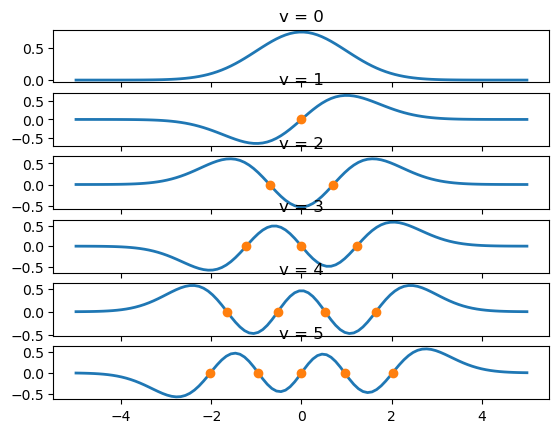

In [10]:
fig, axs = plt.subplots(6)

for v in reversed(range(6)):
    x, y = sympy.symbols('x y')
    sol = sympy.solve(sympy.hermite_poly(v,y), y)
    phi = phi_v(v)
    _phi = sympy.lambdify(x, phi)
    _x = np.linspace(-5.,5.,100)
    axs[v].plot(_x, _phi(_x), linewidth=2)
    axs[v].set_title("v = {0}".format(v))
    axs[v].plot(sol, np.zeros(len(sol)), 'o', label="v = {0}".format(v))

In [104]:
vID.end(cwd0)

**End at:** Wednesday 22 November 2023, 22:29:24  
**Duration:** 00:00:06 917ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>